# HackerRank Developer survey 05.06.2023

Aleksander Blok, Marcel Boxberger, Rafał Curyło, Wiktor Czetrybok, Marcel Dąbrowski


# 1. Short description of the data set

The dataset contains 25,000 responses from a 2016 survey conducted among developers worldwide. It provides insights into their skills, education, roles, and more. The dataset includes students and professionals, offering a comprehensive view of the developer landscape. It is a valuable resource for understanding the global developer community.

# 2. Quick review of the chosen data mining goals

**Data Mining goals:**
  * **Identify trends and patterns:**

  Explore the dataset to identify trends and patterns related to various aspects such as skills, educational background, roles, and more. This could involve analyzing the distribution of different variables, identifying correlations between variables, and uncovering hidden relationships within the data.

* **Understand the developer community:**

 Gain insights into the demographics and characteristics of the developer community. This could involve analyzing factors like age, gender, location, educational background, and employment status to understand the profile of developers


# 3. Discussion of the further steps

* **choosing the data mining task**:

  Based on the goals mentioned above, the appropriate data mining task would be exploratory data analysis and descriptive analytics. EDA involves visually and statistically analyzing the dataset to understand its structure, distributions, and relationships between variables. Descriptive analytics focuses on summarizing and describing the dataset's key characteristics, such as central tendencies, variabilities, and distributions.

* **choosing the modeling algorithm**:

  Since the goal is to identify trends and patterns and understand the developer community, various algorithms can be used depending on the specific analysis required. Some commonly used algorithms for EDA and descriptive analytics include clustering algorithms , and visualization techniques (e.g., scatter plots, histograms). The specific algorithm chosen will depend on the nature of the data and the specific insights sought.

* **choosing the evaluation method**:

  For exploratory data analysis and descriptive analytics, the focus is more on understanding the data not predicting future values and outputs. Therefore, traditional evaluation methods like accuracy or precision may not be directly doable. Instead, evaluation methods can involve visual inspections of patterns and trends, statistical measures such as correlation coefficients, or comparing different subgroups or segments within the dataset. The choice of evaluation method will depend on the specific analysis and the insights being sought.

# 4. Description of data preparation

* **Missing data**

  We are going to replace all NaN values with '#NULL!' for easier data manipulation.

* **Data normalization**

  Due to the previously established fact that the overall quality of the dataset is on a very high level we do not have to normalize the data.

* **Sumplementation and attributes**

  As the dataset size is large enough and shows hefty variety there is no need for any type of supplementing the dataset. Such a procedure will not be needed in our research.

  The dataset comes with a numeric table for answers so there is no need for conversion between nominal and numeric as such conversion was done beforehand. Depending on the model used we were able to use both.

# DATA PREPARATION

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import asarray as ar

initdf = pd.read_csv('/content/HackerRank-Developer-Survey-2018-Values.csv')
initcodebook = pd.read_csv('/content/HackerRank-Developer-Survey-2018-Codebook.csv')

df = initdf.iloc[:,[3,4,5,6,7,9,18,21,23]]
df.head()

<ipython-input-285-c7f4c1b07948>:7: DtypeWarning: Columns (3,10,19,137,138) have mixed types. Specify dtype option on import or set low_memory=False.
  initdf = pd.read_csv('/content/HackerRank-Developer-Survey-2018-Values.csv')


,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q5DegreeFocus,q8JobLevel,q9CurrentRole,q10Industry
0,South Korea,16 - 20 years old,18 - 24 years old,Female,Some college,Computer Science,Student,Student,NaN
1,Ukraine,16 - 20 years old,25 - 34 years old,Male,"Post graduate degree (Masters, PhD)","Other STEM (science, technology, engineering, ...",NaN,Software Test Engineer,Financial Services
2,Malaysia,11 - 15 years old,12 - 18 years old,Female,Some college,"Other STEM (science, technology, engineering, ...",Student,Student,Education
3,Curaçao,11 - 15 years old,12 - 18 years old,Male,College graduate,Computer Science,Student,Student,NaN
4,NaN,16 - 20 years old,25 - 34 years old,Female,College graduate,NaN,Senior developer,Front-end Developer,Technology


In [ ]:
df.shape # shape of the data

(25090, 9)

In [ ]:
#unique values in every column

for col in df:
  print(df[col].unique())

['South Korea' 'Ukraine' 'Malaysia' 'Curaçao' nan 'United States'
 'Switzerland' 'Israel' 'Turkey' 'Lithuania' 'Poland' 'United Kingdom'
 'Canada' 'Romania' 'Brazil' 'Indonesia' 'South Africa' 'India' 'Ireland'
 'Portugal' 'Pakistan' 'Mexico' 'Netherlands' 'Armenia' 'Cyprus' 'China'
 'Colombia' 'Argentina' 'Italy' 'Egypt' 'Sweden' 'Myanmar'
 'Czech Republic' 'Russian Federation' 'Greece' 'Venezuela'
 'United Arab Emirates' 'Thailand' 'Sri Lanka' 'Spain' 'Serbia' 'Peru'
 'Norway' 'Nigeria' 'Morocco' 'Macedonia' 'Kazakhstan' 'Japan' 'Jamaica'
 'Germany' 'France' 'Denmark' 'Cuba' 'Cambodia' 'Bangladesh' 'Australia'
 'Singapore' 'Taiwan' 'New Zealand' 'Bulgaria' 'Estonia' 'Azerbaijan'
 'Belarus' 'Georgia' 'Lebanon' 'Philippines' 'Nepal' 'Hungary' 'Croatia'
 'Vietnam' 'Jordan' 'Bolivia' 'Belgium' 'Finland' 'Qatar' 'Hong Kong'
 'Slovenia' 'Saudi Arabia' 'Austria' 'Latvia' 'Slovak Republic'
 'Mauritius' 'Mongolia' 'Iran' 'Czechia' 'Tunisia' 'Uganda' 'Uruguay'
 'Kenya' 'Guatemala' 'Chile' 'Cam

In [ ]:
#null values

df.isnull().sum()

CountryNumeric2     3991
q1AgeBeginCoding       0
q2Age                  0
q3Gender               0
q4Education            0
q5DegreeFocus       1159
q8JobLevel           957
q9CurrentRole       1000
q10Industry         2520
dtype: int64

In [ ]:
#Replacing null values with "#NULL!" and checking the changes

df.replace(np.nan,'#NULL!',inplace = True)
df.isnull().sum()

<ipython-input-289-3ec659f4eec6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(np.nan,'#NULL!',inplace = True)


CountryNumeric2     0
q1AgeBeginCoding    0
q2Age               0
q3Gender            0
q4Education         0
q5DegreeFocus       0
q8JobLevel          0
q9CurrentRole       0
q10Industry         0
dtype: int64

In [ ]:
# checking datatypes

df.dtypes

CountryNumeric2     object
q1AgeBeginCoding    object
q2Age               object
q3Gender            object
q4Education         object
q5DegreeFocus       object
q8JobLevel          object
q9CurrentRole       object
q10Industry         object
dtype: object

In [ ]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25090 entries, 0 to 25089
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CountryNumeric2   25090 non-null  object
 1   q1AgeBeginCoding  25090 non-null  object
 2   q2Age             25090 non-null  object
 3   q3Gender          25090 non-null  object
 4   q4Education       25090 non-null  object
 5   q5DegreeFocus     25090 non-null  object
 6   q8JobLevel        25090 non-null  object
 7   q9CurrentRole     25090 non-null  object
 8   q10Industry       25090 non-null  object
dtypes: object(9)
memory usage: 1.7+ MB


,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q5DegreeFocus,q8JobLevel,q9CurrentRole,q10Industry
count,25090,25090,25090,25090,25090,25090,25090,25090,25090
unique,153,10,10,4,8,3,11,20,21
top,India,16 - 20 years old,18 - 24 years old,Male,College graduate,Computer Science,Student,Student,Technology
freq,8088,14293,12589,20774,12010,17972,10351,8005,10066


# EXPLORATORY DATA ANALYSIS

**Distribution of countries**

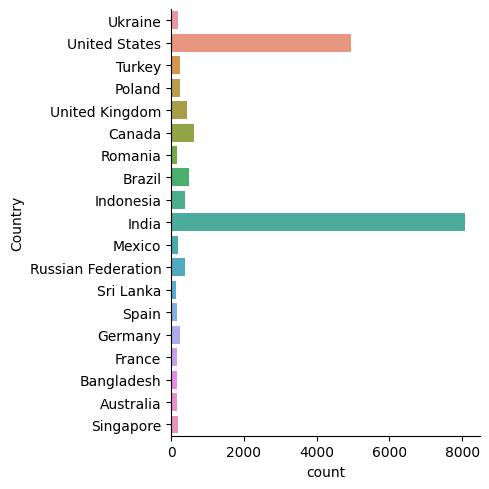

In [ ]:
temp = df['CountryNumeric2'].value_counts().head(20)

ls = list(temp.index)
tempdf = df[df['CountryNumeric2'].isin(ls)]
g = sns.catplot(data=tempdf[tempdf['CountryNumeric2'] != '#NULL!'], y='CountryNumeric2', kind='count')
g.set_ylabels('Country')

**Age category and gender distribution**

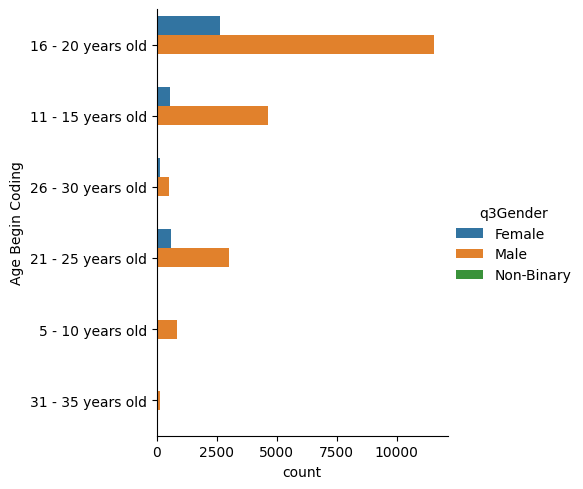

In [ ]:
temp = df['q1AgeBeginCoding'].value_counts().head(6)

ls = list(temp.index)
tempdf = df[df['q1AgeBeginCoding'].isin(ls)]
g = sns.catplot(data=tempdf[tempdf['q3Gender'] != '#NULL!'], y='q1AgeBeginCoding', kind='count', hue='q3Gender')
g.set_ylabels('Age Begin Coding')

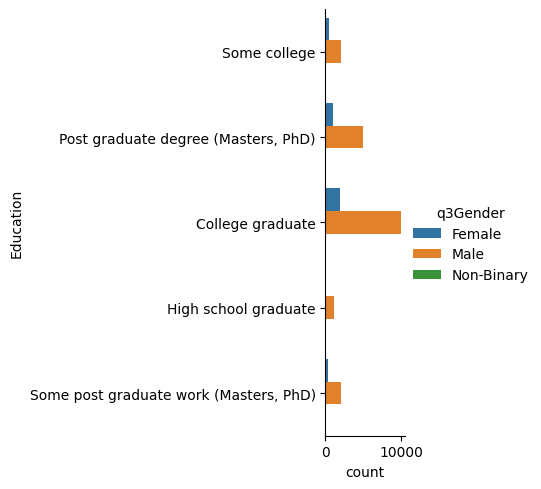

In [ ]:
temp = df['q4Education'].value_counts().head(5)
ls = list(temp.index)
tempdf = df[df['q4Education'].isin(ls)]
g = sns.catplot(data=tempdf[tempdf['q3Gender'] != '#NULL!'], y='q4Education', kind='count', hue='q3Gender')
g.set_ylabels('Education')

Text(0.5, 0.98, 'Love or Hate programming language')

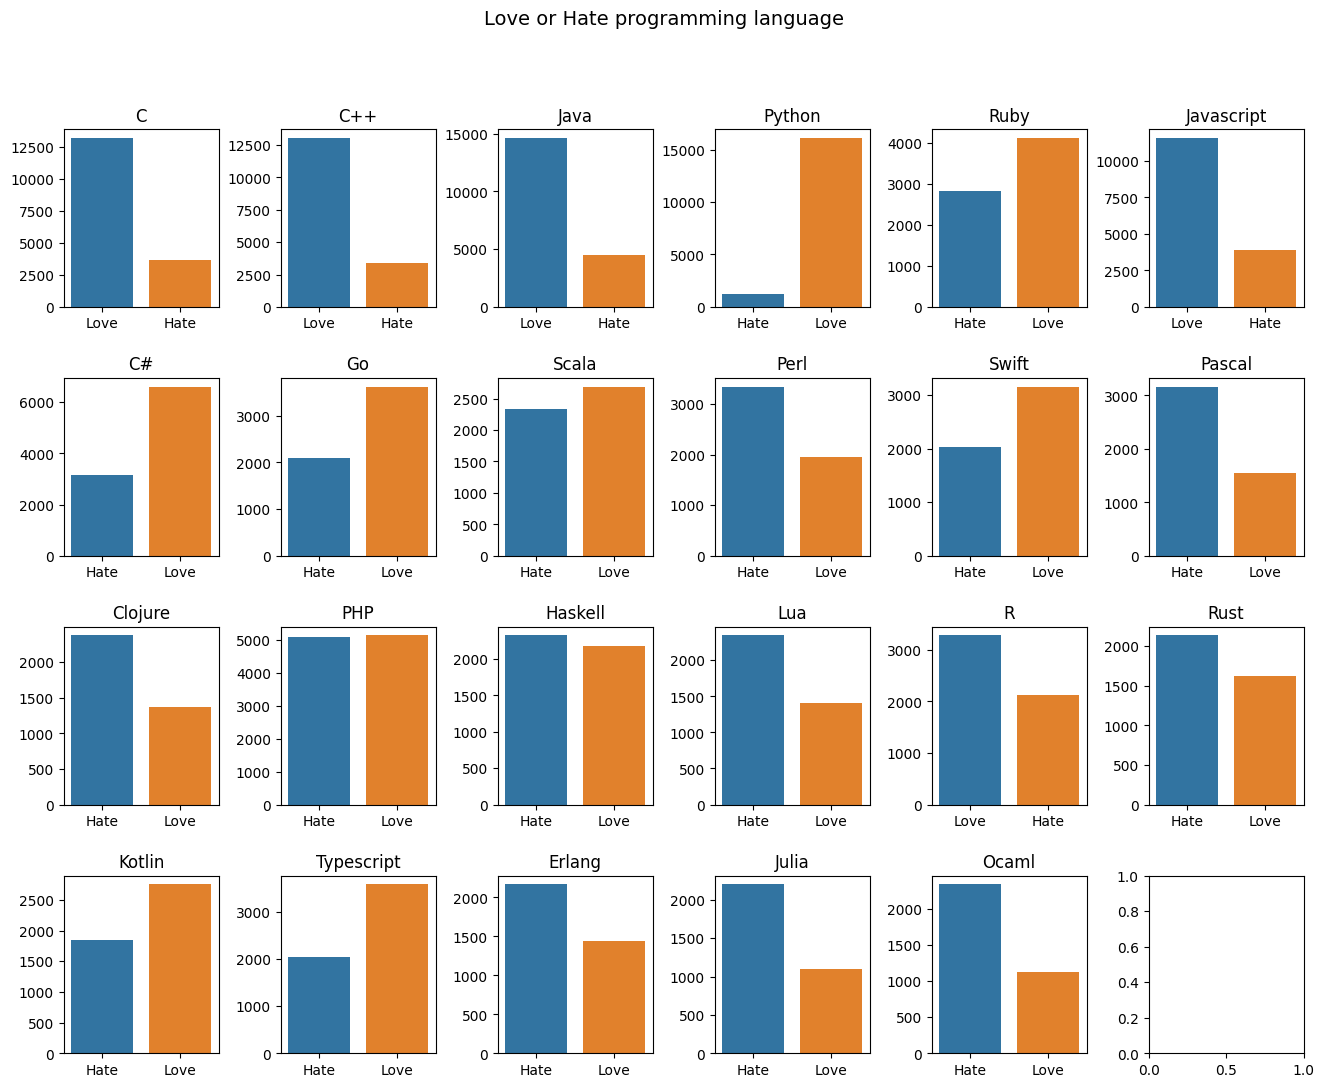

In [ ]:
columns = initdf.columns[initdf.columns.str.startswith('q28')]
length = len(columns)
columns = columns.drop('q28LoveOther')
f,ax= plt.subplots(4,6,figsize=(16,12))
axs = ax.ravel()
for i,c in enumerate(columns):
    if initdf[c].nunique()>1:
        sns.countplot(x=initdf[c],ax=axs[i])
        axs[i].set_ylabel('')
        axs[i].set_xlabel('')
        axs[i].set_title(initcodebook[initcodebook['Data Field'] == c]['Survey Question'].iloc[0])
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.suptitle('Love or Hate programming language',fontsize=14)

Text(0.5, 0.98, 'Programming Language known or willing to learn')

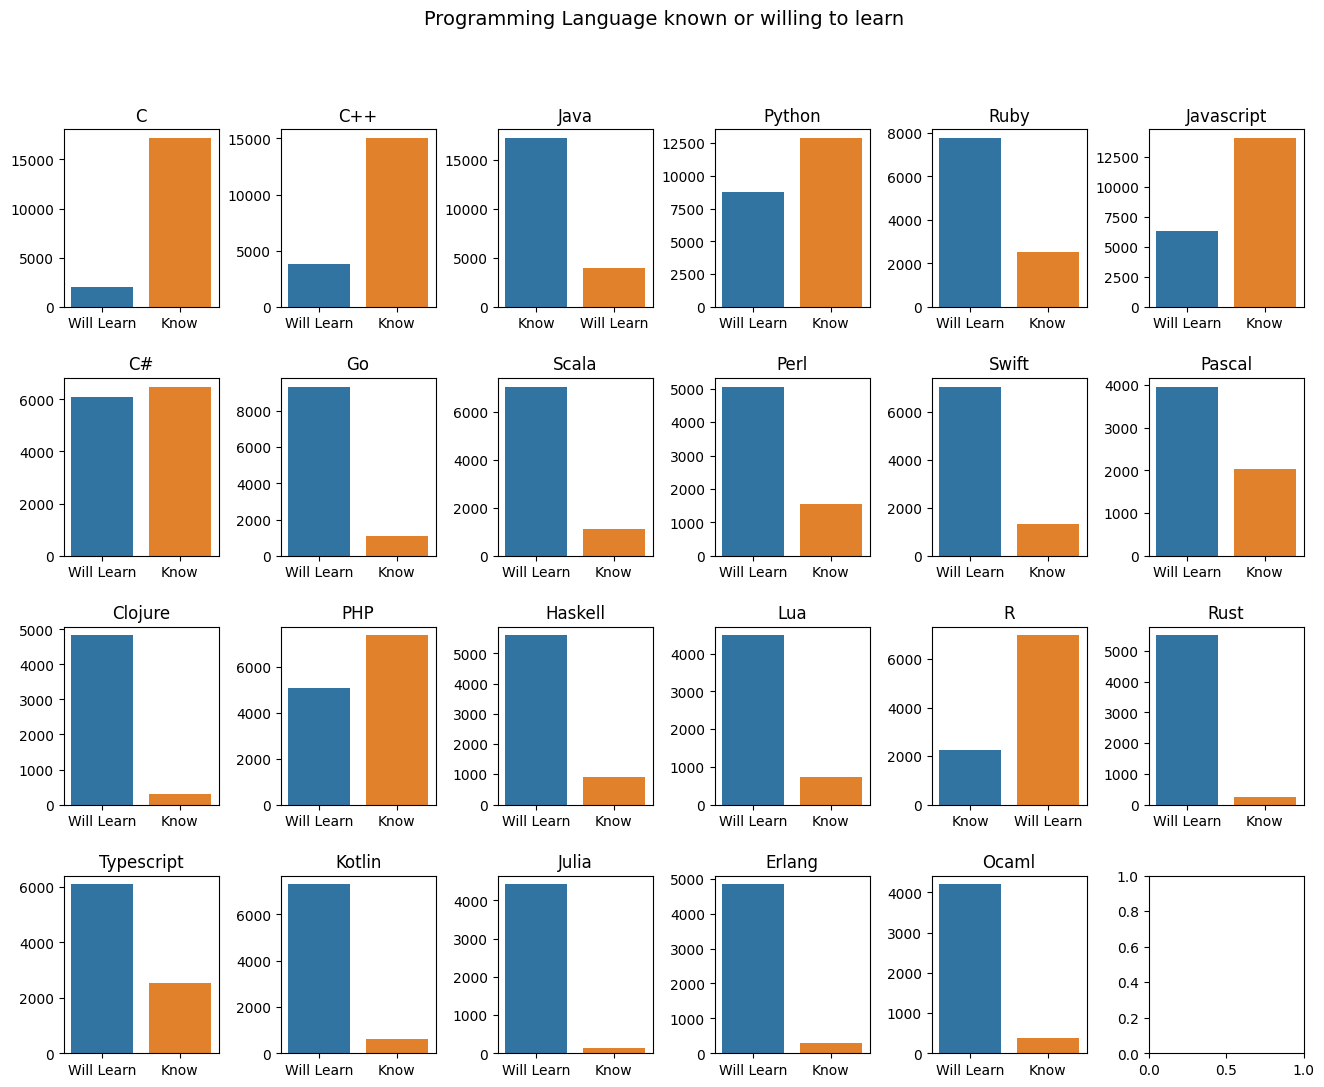

In [ ]:
columns = initdf.columns[initdf.columns.str.startswith('q25')]
length = len(columns)
columns = columns.drop('q25LangOther')
f,ax= plt.subplots(4,6,figsize=(16,12))
axs = ax.ravel()
for i,c in enumerate(columns):
    if initdf[c].nunique()>1:
        sns.countplot(x=initdf[c],ax=axs[i])
        axs[i].set_ylabel('')
        axs[i].set_xlabel('')
        axs[i].set_title(initcodebook[initcodebook['Data Field'] == c]['Survey Question'].iloc[0])
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.suptitle('Programming Language known or willing to learn',fontsize=14)

Text(0.5, 0.98, 'Framework known or willing to learn')

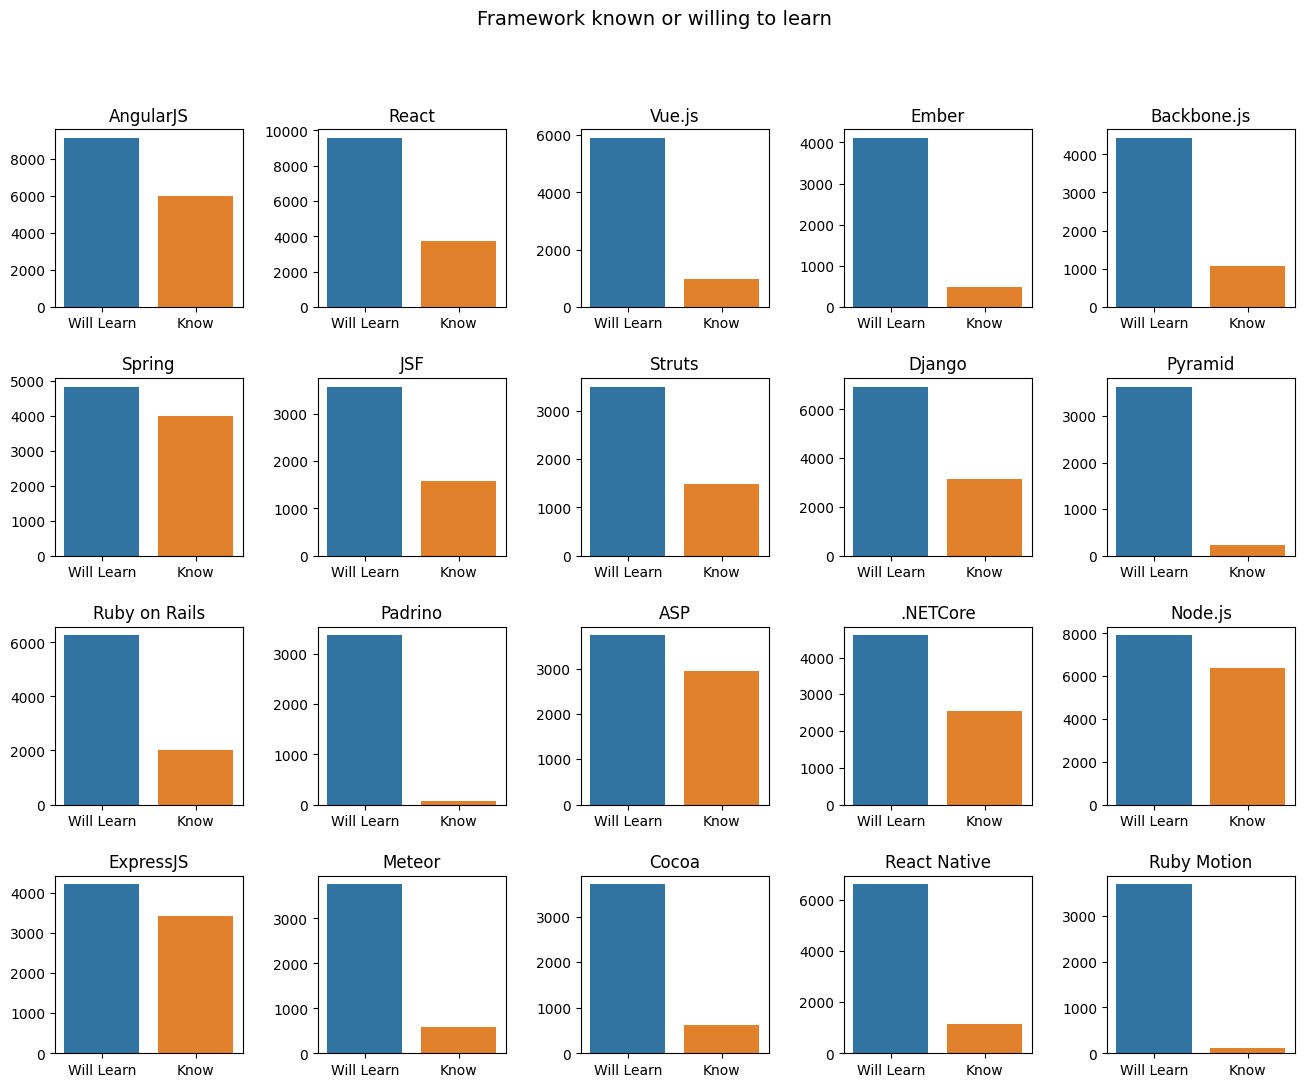

In [ ]:
columns = initdf.columns[initdf.columns.str.startswith('q26')]
length = len(columns)
f,ax= plt.subplots(4,5,figsize=(16,12))
axs = ax.ravel()
for i,c in enumerate(columns):
    if initdf[c].nunique()>1:
        sns.countplot(x=initdf[c],ax=axs[i])
        axs[i].set_ylabel('')
        axs[i].set_xlabel('')
        axs[i].set_title(initcodebook[initcodebook['Data Field'] == c]['Survey Question'].iloc[0])
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.suptitle('Framework known or willing to learn',fontsize=14)